In [1]:
import pandas as pd

DATA_PATH = 'https://www.notion.so/signed/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F75a740fb-4146-455a-8d13-6a24ba56d2c8%2Fstreaming_data.csv?table=block&id=7f01c93d-8cfd-46fb-9f2a-8f0bbd2fbaae&spaceId=6a055055-52ec-4ebb-a697-63027c951344&userId=c0845f00-59fb-4a0f-bb4a-c1e2314cd202&cache=v2'

df = pd.read_csv(DATA_PATH)
df.head(4)

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2


In [2]:
df.columns[df.isna().any()]

Index(['Age', 'Gender', 'Time_on_platform', 'Devices_connected',
       'Subscription_type', 'Num_streaming_services', 'Avg_rating', 'Churned'],
      dtype='object')

In [3]:
cols_nan = ['Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Avg_rating', 'Churned']
df[cols_nan] = df[cols_nan].fillna(0)

In [4]:
df.dropna(inplace=True)

In [5]:
df['Churned'] = df['Churned'].replace(to_replace=[0, 1], value=['No', 'Yes'])

In [6]:
df.dtypes

Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                    object
User_id                    object
dtype: object

In [7]:
cols_int = {
  'Age': 'int64',
  'Time_on_platform': 'int64',
  'Devices_connected': 'int64',
  'Num_streaming_services': 'int64',
  'Avg_rating': 'int64'
}

df = df.astype(cols_int)

In [8]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

le = LabelEncoder()
mm = MinMaxScaler()

y = le.fit_transform(df['Churned'])
X = pd.DataFrame( # fit_transform returns an array, then convert to pd.DF
  mm.fit_transform( # Apply MinMaxScaler fit_transform
  pd.get_dummies( # Get dummies from X
  df.drop(columns=['Churned', 'User_id'], axis=1))))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [25]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test)).head(4)

,0,1,2,3,4,5,6,7,8,9,10,churn,label
31215,0.549020,0.00000,0.8,0.0,0.25,0.2,0.0,1.0,0.0,1.0,0.0,1,0
14627,1.000000,0.73924,0.4,0.0,0.00,0.4,1.0,0.0,0.0,1.0,0.0,0,0
13961,0.745098,0.00000,0.2,0.0,0.75,0.6,0.0,1.0,0.0,0.0,1.0,0,0
26407,0.490196,0.00000,0.0,0.0,1.00,0.6,1.0,0.0,0.0,0.0,1.0,0,0


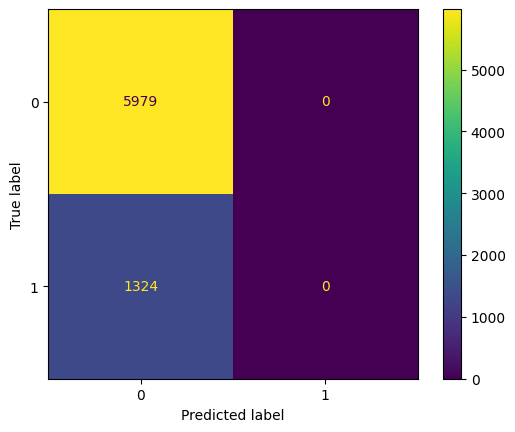

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, lr.predict(X_test))).plot()

In [13]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f'accuracy (train) -> {accuracy_score(y_train, lr.predict(X_train))}\n\
accuracy (test)  -> {accuracy_score(y_test, lr.predict(X_test))}\n\
======================================\n\
balanced accuracy (train) -> {balanced_accuracy_score(y_train, lr.predict(X_train))}\n\
balanced accuracy (test)  -> {balanced_accuracy_score(y_test, lr.predict(X_test))}\n\
======================================\n\
precision (train) -> {precision_score(y_train, lr.predict(X_train))}\n\
precision (test)  -> {precision_score(y_test, lr.predict(X_test))}\n\
======================================\n\
recall (train) -> {recall_score(y_train, lr.predict(X_train))}\n\
recall (test)  -> {recall_score(y_test, lr.predict(X_test))}\n\
======================================\n\
f1_score (train) -> {f1_score(y_train, lr.predict(X_train))}\n\
f1_score (test)  -> {f1_score(y_test, lr.predict(X_test))}\n\
======================================\n\
rocauc (train) -> {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}\n\
rocauc (test)  -> {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}')

accuracy (train) -> 0.8037792687936465
accuracy (test)  -> 0.8187046419279748
balanced accuracy (train) -> 0.5
balanced accuracy (test)  -> 0.5
precision (train) -> 0.0
precision (test)  -> 0.0
recall (train) -> 0.0
recall (test)  -> 0.0
f1_score (train) -> 0.0
f1_score (test)  -> 0.0
rocauc (train) -> 0.51103529707396
rocauc (test)  -> 0.5060149470781168


c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
  'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
  'max_iter': [100, 300, 500]
}
gs = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
135 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jeanl\AppD

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'max_iter': [100, 300, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [21]:
gs.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [22]:
lr_tunned = LogisticRegression(C=1.0,
class_weight=None,
dual=False,
fit_intercept=True,
intercept_scaling=1,
l1_ratio=None,
max_iter=100,
multi_class='auto',
n_jobs=None,
penalty='l1',
random_state=None,
solver='liblinear',
tol=0.0001,
verbose=0,
warm_start=False)
lr_tunned.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [26]:
X_test.assign(churn = y_test).assign(label = lr_tunned.predict(X_test)).head(4)

,0,1,2,3,4,5,6,7,8,9,10,churn,label
31215,0.549020,0.00000,0.8,0.0,0.25,0.2,0.0,1.0,0.0,1.0,0.0,1,0
14627,1.000000,0.73924,0.4,0.0,0.00,0.4,1.0,0.0,0.0,1.0,0.0,0,0
13961,0.745098,0.00000,0.2,0.0,0.75,0.6,0.0,1.0,0.0,0.0,1.0,0,0
26407,0.490196,0.00000,0.0,0.0,1.00,0.6,1.0,0.0,0.0,0.0,1.0,0,0


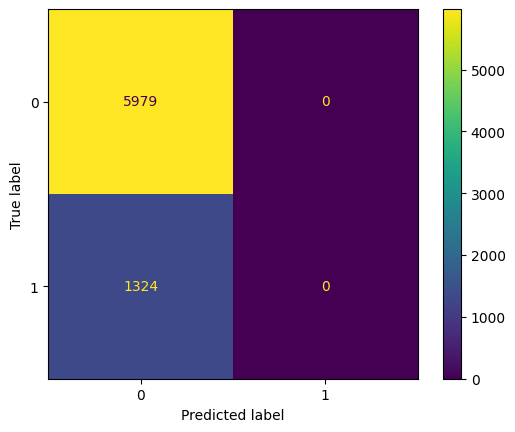

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, lr_tunned.predict(X_test))).plot()

In [24]:
print(f'accuracy (train) -> {accuracy_score(y_train, lr_tunned.predict(X_train))}\n\
accuracy (test)  -> {accuracy_score(y_test, lr_tunned.predict(X_test))}\n\
======================================\n\
balanced accuracy (train) -> {balanced_accuracy_score(y_train, lr_tunned.predict(X_train))}\n\
balanced accuracy (test)  -> {balanced_accuracy_score(y_test, lr_tunned.predict(X_test))}\n\
======================================\n\
precision (train) -> {precision_score(y_train, lr_tunned.predict(X_train))}\n\
precision (test)  -> {precision_score(y_test, lr_tunned.predict(X_test))}\n\
======================================\n\
recall (train) -> {recall_score(y_train, lr_tunned.predict(X_train))}\n\
recall (test)  -> {recall_score(y_test, lr_tunned.predict(X_test))}\n\
======================================\n\
f1_score (train) -> {f1_score(y_train, lr_tunned.predict(X_train))}\n\
f1_score (test)  -> {f1_score(y_test, lr_tunned.predict(X_test))}\n\
======================================\n\
rocauc (train) -> {roc_auc_score(y_train, lr_tunned.predict_proba(X_train)[:,1])}\n\
rocauc (test)  -> {roc_auc_score(y_test, lr_tunned.predict_proba(X_test)[:,1])}')

accuracy (train) -> 0.8037792687936465
accuracy (test)  -> 0.8187046419279748
balanced accuracy (train) -> 0.5
balanced accuracy (test)  -> 0.5
precision (train) -> 0.0
precision (test)  -> 0.0
recall (train) -> 0.0
recall (test)  -> 0.0
f1_score (train) -> 0.0
f1_score (test)  -> 0.0
rocauc (train) -> 0.5110240553050449
rocauc (test)  -> 0.5056246080819626


c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
parameters = {'max_depth': [i for i in range(1, 11)],
              'n_estimators': [100, 300, 500]}

gs = GridSearchCV(rfc, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [34]:
gs.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
rfc_tunned = RandomForestClassifier(bootstrap=True,
ccp_alpha=0.0,
class_weight=None,
criterion='gini',
max_depth=10,
max_features='sqrt',
max_leaf_nodes=None,
max_samples=None,
min_impurity_decrease=0.0,
min_samples_leaf=1,
min_samples_split=2,
min_weight_fraction_leaf=0.0,
n_estimators=300,
n_jobs=None,
oob_score=False,
random_state=None,
verbose=0,
warm_start=False
)
rfc_tunned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300)

In [37]:
X_test.assign(churn = y_test).assign(label = rfc_tunned.predict(X_test)).head(4)

,0,1,2,3,4,5,6,7,8,9,10,churn,label
31215,0.549020,0.00000,0.8,0.0,0.25,0.2,0.0,1.0,0.0,1.0,0.0,1,0
14627,1.000000,0.73924,0.4,0.0,0.00,0.4,1.0,0.0,0.0,1.0,0.0,0,0
13961,0.745098,0.00000,0.2,0.0,0.75,0.6,0.0,1.0,0.0,0.0,1.0,0,0
26407,0.490196,0.00000,0.0,0.0,1.00,0.6,1.0,0.0,0.0,0.0,1.0,0,0


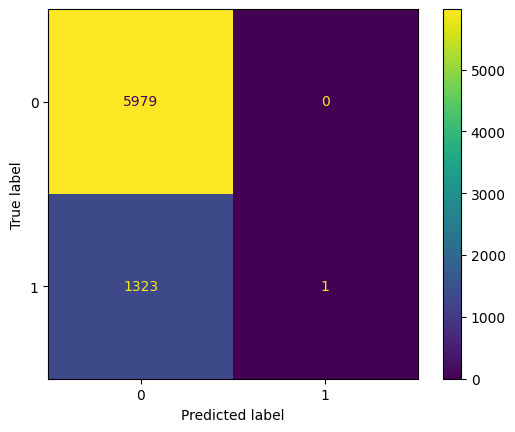

In [38]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rfc_tunned.predict(X_test))).plot()

In [39]:
print(f'accuracy (train) -> {accuracy_score(y_train, rfc_tunned.predict(X_train))}\n\
accuracy (test)  -> {accuracy_score(y_test, rfc_tunned.predict(X_test))}\n\
======================================\n\
balanced accuracy (train) -> {balanced_accuracy_score(y_train, rfc_tunned.predict(X_train))}\n\
balanced accuracy (test)  -> {balanced_accuracy_score(y_test, rfc_tunned.predict(X_test))}\n\
===============================================\n\
precision (train) -> {precision_score(y_train, rfc_tunned.predict(X_train))}\n\
precision (test)  -> {precision_score(y_test, rfc_tunned.predict(X_test))}\n\
=======================================\n\
recall (train) -> {recall_score(y_train, rfc_tunned.predict(X_train))}\n\
recall (test)  -> {recall_score(y_test, rfc_tunned.predict(X_test))}\n\
====================================\n\
f1_score (train) -> {f1_score(y_train, rfc_tunned.predict(X_train))}\n\
f1_score (test)  -> {f1_score(y_test, rfc_tunned.predict(X_test))}\n\
======================================\n\
rocauc (train) -> {roc_auc_score(y_train, rfc_tunned.predict_proba(X_train)[:,1])}\n\
rocauc (test)  -> {roc_auc_score(y_test, rfc_tunned.predict_proba(X_test)[:,1])}')

accuracy (train) -> 0.8048404765165
accuracy (test)  -> 0.8188415719567301
balanced accuracy (train) -> 0.5027041172365666
balanced accuracy (test)  -> 0.5003776435045317
precision (train) -> 1.0
precision (test)  -> 1.0
recall (train) -> 0.0054082344731332865
recall (test)  -> 0.0007552870090634441
f1_score (train) -> 0.010758285615131008
f1_score (test)  -> 0.0015094339622641509
rocauc (train) -> 0.8881988397721747
rocauc (test)  -> 0.5966394086250517
